In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [51]:
df= pd.read_csv("/Users/sarahboller/Desktop/CF Achievement 6/02 Data/data for supervised machine learning.csv" ,index_col = False)

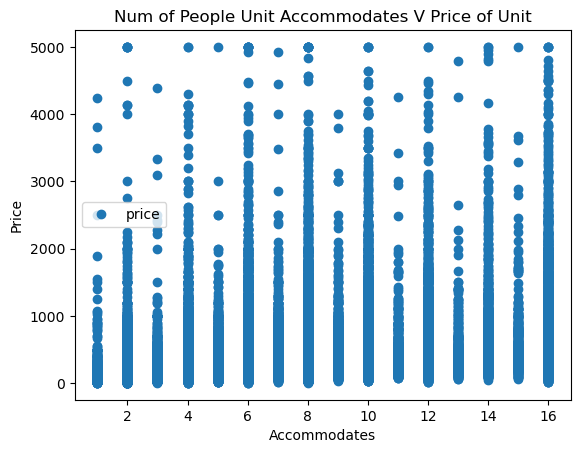

In [52]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'accommodates', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Num of People Unit Accommodates V Price of Unit')  
plt.xlabel('Accommodates')  
plt.ylabel('Price')  
plt.show()

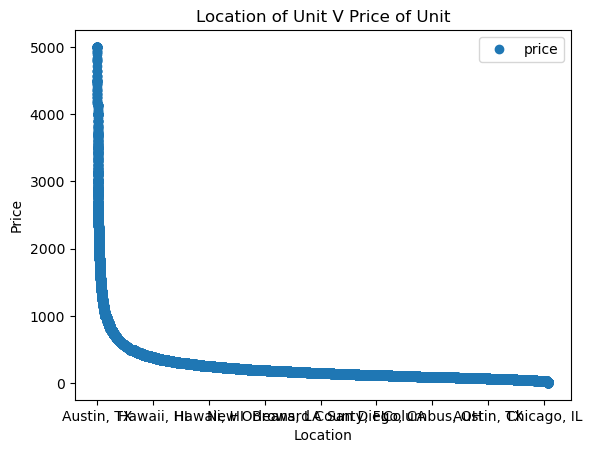

In [53]:
df.plot(x = 'listing_city', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Location of Unit V Price of Unit')  
plt.xlabel('Location')  
plt.ylabel('Price')  
plt.show()

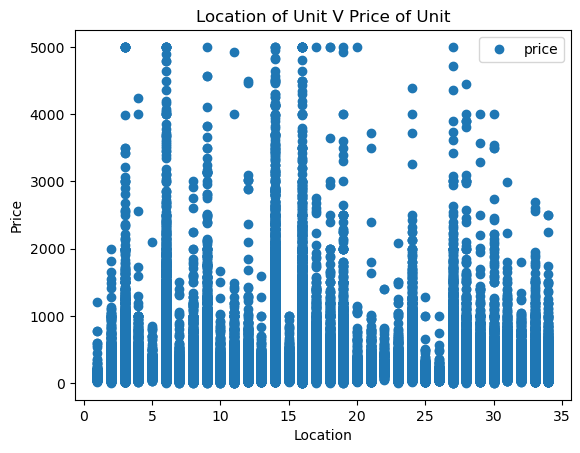

In [54]:
df.plot(x = 'City Code', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Location of Unit V Price of Unit')  
plt.xlabel('Location')  
plt.ylabel('Price')  
plt.show()

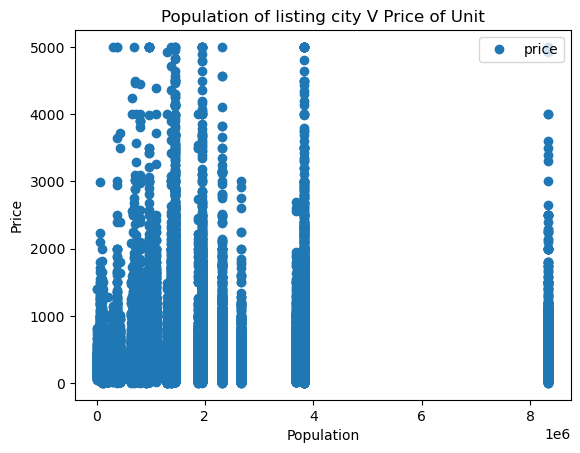

In [55]:
df.plot(x = 'Population', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population of listing city V Price of Unit')  
plt.xlabel('Population')  
plt.ylabel('Price')  
plt.show()

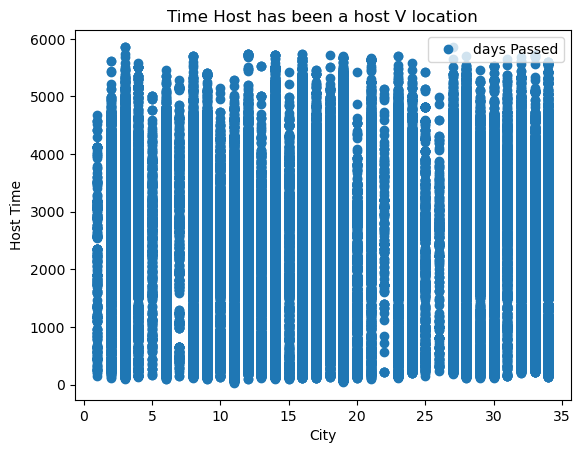

In [56]:
df.plot(x = 'City Code', y='days Passed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Time Host has been a host V location')  
plt.xlabel('City')  
plt.ylabel('Host Time')  
plt.show()

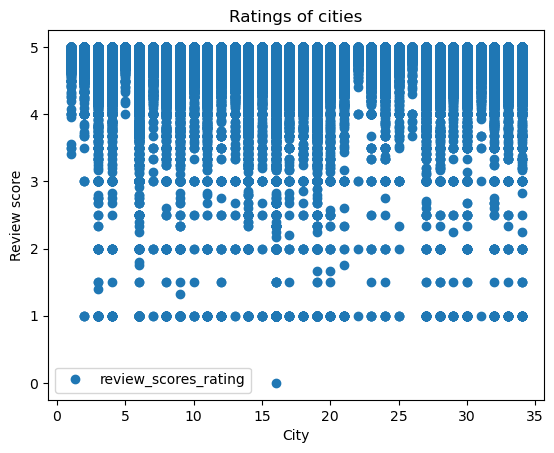

In [57]:
df.plot(x = 'City Code', y='review_scores_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Ratings of cities')  
plt.xlabel('City')  
plt.ylabel('Review score')  
plt.show()

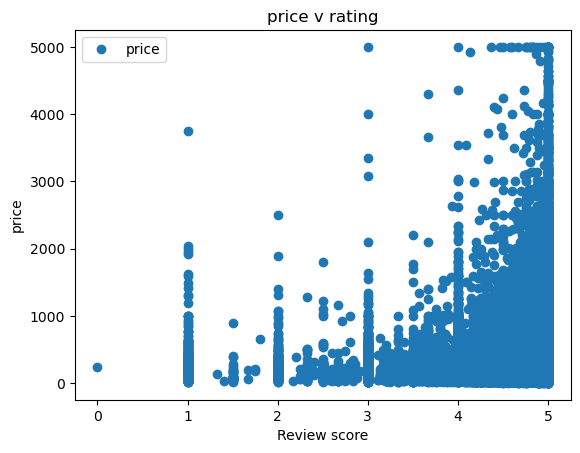

In [58]:
df.plot(x = 'review_scores_rating', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('price v rating')  
plt.xlabel('Review score')  
plt.ylabel('price')  
plt.show()

In [59]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['review_scores_rating'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [60]:
X

array([[4.91],
       [4.67],
       [4.78],
       ...,
       [4.72],
       [5.  ],
       [5.  ]])

In [61]:
y

array([[5000],
       [5000],
       [5000],
       ...,
       [   9],
       [   7],
       [   5]])

In [62]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [64]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [91]:
## I predict a slight curve up showing the higher the rating, the higher the price. I think there are a lot of factors that go into the price of a unit. This is just one.

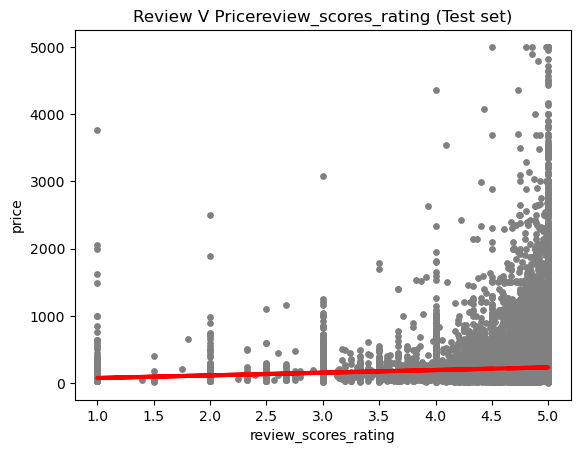

In [92]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Review V Pricereview_scores_rating (Test set)')
plot_test.xlabel('review_scores_rating')
plot_test.ylabel('price')
plot_test.show()

In [67]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [68]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.57372142]]
Mean squared error:  75849.24184849656
R2 score:  0.0034865516351855197


In [69]:
y_predicted

array([[220.06273081],
       [228.37321231],
       [233.91353331],
       ...,
       [233.91353331],
       [227.97747509],
       [214.1266726 ]])

In [70]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,140,220.062731
1,45,228.373212
2,215,233.913533
3,254,231.143373
4,151,227.186001
5,126,225.603052
6,129,229.956161
7,750,222.041417
8,130,227.186001
9,85,231.934847


In [71]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [72]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [73]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.57372142]]
Mean squared error:  73725.05489771103
R2 score:  0.003478784208488239


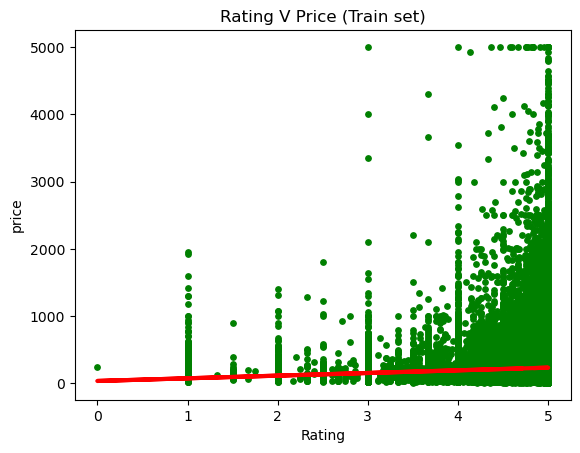

In [76]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Rating V Price (Train set)')
plot_test.xlabel('Rating')
plot_test.ylabel('price')
plot_test.show()

In [78]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['price'] <=2000] 

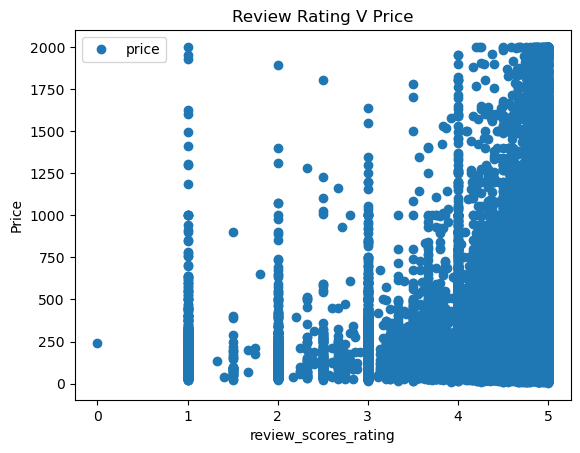

In [79]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'review_scores_rating', y='price', style='o')  
plt.title('Review Rating V Price')  
plt.xlabel('review_scores_rating')  
plt.ylabel('Price')  
plt.show()

In [83]:
# Reshape again.

X_2 = df_test['review_scores_rating'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [84]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [85]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [86]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [87]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [88]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[34.54468945]]
Mean squared error:  45514.57978457022
R2 score:  0.003999631055583652


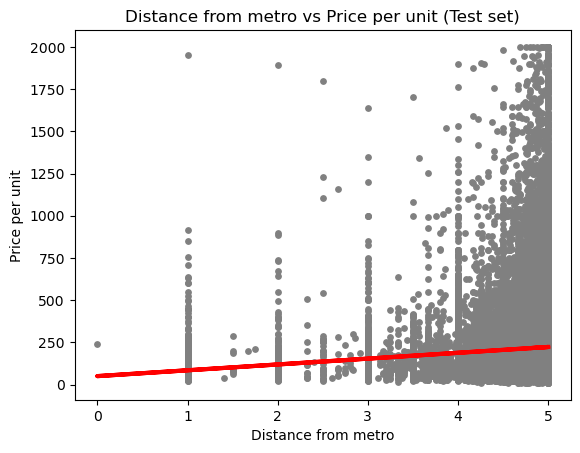

In [89]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [90]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,592,216.728151
1,229,222.946196
2,210,222.946196
3,100,222.946196
4,94,199.455807
5,109,222.255302
6,166,209.473767
7,72,213.273682
8,260,220.182620
9,66,222.946196


In [93]:
## Overall I think the model did fine. There are so many variables that go into a rating and a price point. It is hard to point to just one and use it to predict future data